<a href="https://colab.research.google.com/github/lrfurst/Challenger2_Telecom-X/blob/main/Challenge2_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings('ignore')

In [8]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [10]:
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [11]:
print("\nInfo:")
df.info()
print("\nValores Nulos:")
print(df.isnull().sum())
print("\nEstatísticas:")
print(df.describe(include='all'))


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Valores Nulos:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Estatísticas:
        customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                             

In [12]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [13]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])
df = pd.concat([df.drop(columns=['customer', 'phone', 'internet', 'account']), df_customer, df_phone, df_internet, df_account], axis=1)
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [16]:
df['customerID'] = df['customerID'].astype(str)
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['Charges.Total'].fillna(df['Charges.Total'].median(), inplace=True)
df['Charges.Monthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df[col] = df[col].replace('No internet service', 'No')
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [17]:
for col in binary_cols:
    if df[col].dtype == 'object': # Apenas converte se for object (string)
         df[col] = df[col].apply(lambda x: 1 if x == 'Yes' or x == 'Male' else 0)
    elif col == 'SeniorCitizen': # SeniorCitizen já parece ser 0 ou 1
        df[col] = df[col].astype(int)

In [18]:
print("\nNovos tipos de dados:")
print(df.dtypes)


Novos tipos de dados:
customerID           object
Churn                 int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object


In [19]:
print("\nValores Nulos após tratamento:")
print(df.isnull().sum())


Valores Nulos após tratamento:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [20]:
print("\nPrimeiras linhas após transformações:")
print(df.head())


Primeiras linhas após transformações:
   customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO      0       0              0        1           1       9   
1  0003-MKNFE      0       1              0        0           0       9   
2  0004-TLHLJ      1       1              0        0           0       4   
3  0011-IGKFF      1       1              1        1           0      13   
4  0013-EXCHZ      1       0              1        1           0       3   

   PhoneService  MultipleLines InternetService  ...  OnlineBackup  \
0             1              0             DSL  ...             1   
1             1              1             DSL  ...             0   
2             1              0     Fiber optic  ...             0   
3             1              0     Fiber optic  ...             1   
4             1              0     Fiber optic  ...             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0    

In [21]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,0,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,1,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,1,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,1,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [23]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.drop_duplicates(inplace=True)

In [24]:
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(np.nanmedian(df[col]))

In [25]:
churn_clientes = df[df['churn'] == 1]

print("Clientes que cancelaram o serviço (churn):")
print(churn_clientes.head())

Clientes que cancelaram o serviço (churn):
    customerid  churn  gender  seniorcitizen  partner  dependents  tenure  \
2   0004-TLHLJ      1       1              0        0           0       4   
3   0011-IGKFF      1       1              1        1           0      13   
4   0013-EXCHZ      1       0              1        1           0       3   
18  0022-TCJCI      1       1              1        0           0      45   
19  0023-HGHWL      1       1              1        0           0       1   

    phoneservice  multiplelines internetservice  ...  onlinebackup  \
2              1              0     Fiber optic  ...             0   
3              1              0     Fiber optic  ...             1   
4              1              0     Fiber optic  ...             0   
18             1              0             DSL  ...             0   
19             0              0             DSL  ...             0   

    deviceprotection  techsupport  streamingtv  streamingmovies  \
2     

In [26]:
print(churn_clientes['gender'].value_counts())

gender
0    939
1    930
Name: count, dtype: int64


In [27]:
print(churn_clientes['contract'].value_counts())

contract
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64


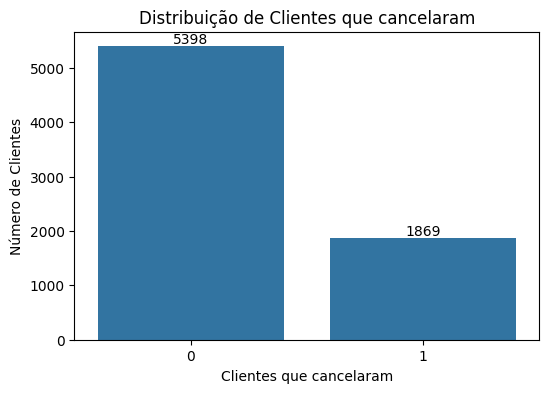

In [36]:
churn_counts_viz = df['churn'].value_counts()
plt.figure(figsize=(6, 4))
ax1 = sns.barplot(x=churn_counts_viz.index, y=churn_counts_viz.values)
plt.title('Distribuição de Clientes que cancelaram')
plt.xlabel('Clientes que cancelaram')
plt.ylabel('Número de Clientes')
for container in ax1.containers:
    ax1.bar_label(container)
plt.show()

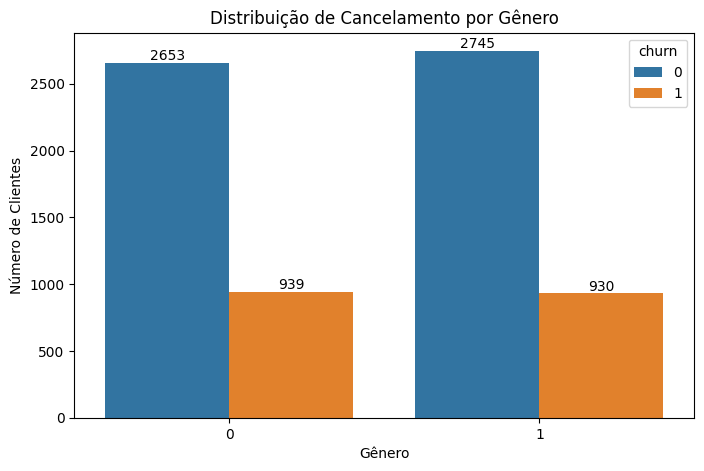

In [37]:
plt.figure(figsize=(8, 5))
ax2 = sns.countplot(x='gender', hue='churn', data=df)
plt.title('Distribuição de Cancelamento por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
for container in ax2.containers:
    ax2.bar_label(container)
plt.show()

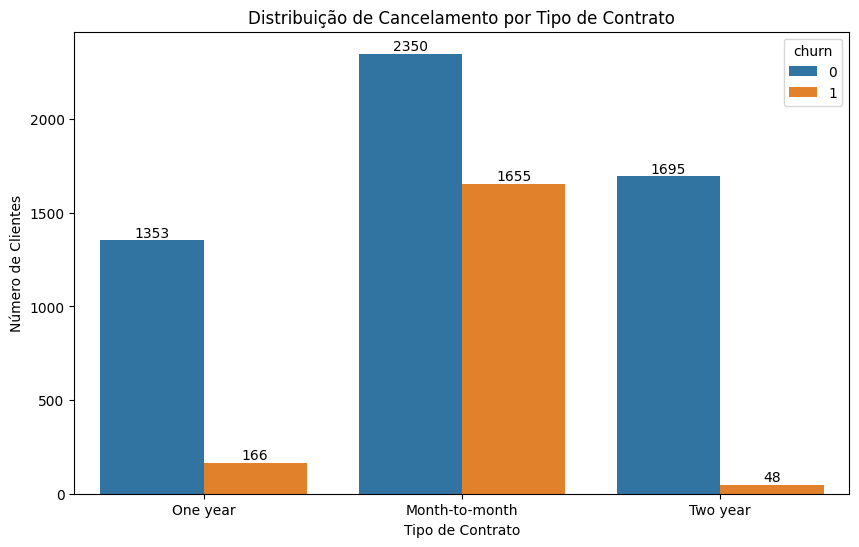

In [38]:
plt.figure(figsize=(10, 6))
ax3 = sns.countplot(x='contract', hue='churn', data=df)
plt.title('Distribuição de Cancelamento por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
for container in ax3.containers:
    ax3.bar_label(container)
plt.show()

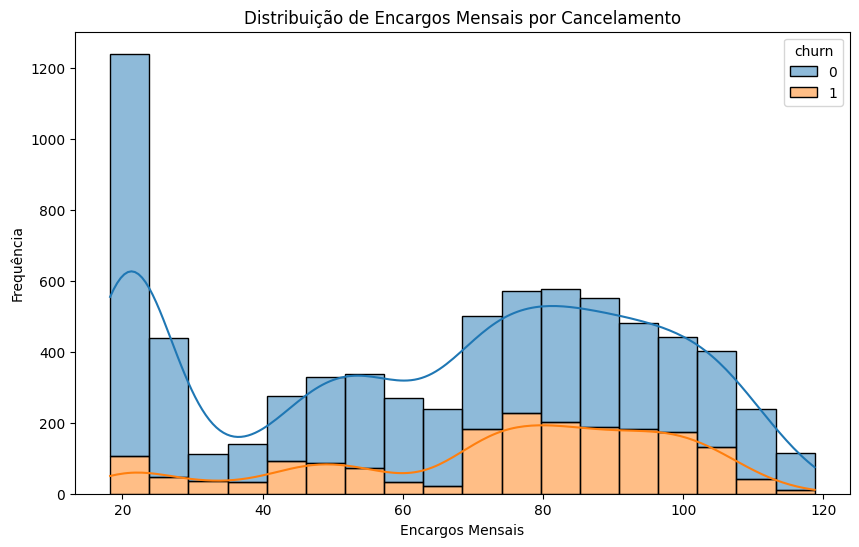

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='charges.monthly', hue='churn', multiple="stack", kde=True)
plt.title('Distribuição de Encargos Mensais por Cancelamento')
plt.xlabel('Encargos Mensais')
plt.ylabel('Frequência')
plt.show()

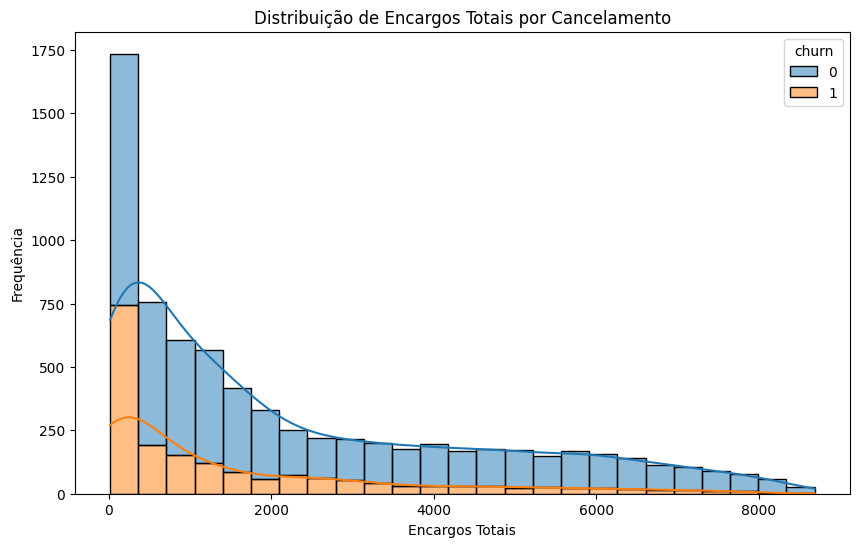

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df.dropna(subset=['charges.total']), x='charges.total', hue='churn', multiple="stack", kde=True)
plt.title('Distribuição de Encargos Totais por Cancelamento')
plt.xlabel('Encargos Totais')
plt.ylabel('Frequência')
plt.show()

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df_viz = df.copy()
df_viz['gender'] = df_viz['gender'].map({1: 'Male', 0: 'Female'})
df_viz['seniorcitizen'] = df_viz['seniorcitizen'].map({1: 'Yes', 0: 'No'})
df_viz['partner'] = df_viz['partner'].map({1: 'Yes', 0: 'No'})
df_viz['dependents'] = df_viz['dependents'].map({1: 'Yes', 0: 'No'})
df_viz['phoneservice'] = df_viz['phoneservice'].map({1: 'Yes', 0: 'No'})
df_viz['multiplelines'] = df_viz['multiplelines'].map({1: 'Yes', 0: 'No'})
df_viz['onlinesecurity'] = df_viz['onlinesecurity'].map({1: 'Yes', 0: 'No'})
df_viz['onlinebackup'] = df_viz['onlinebackup'].map({1: 'Yes', 0: 'No'})
df_viz['deviceprotection'] = df_viz['deviceprotection'].map({1: 'Yes', 0: 'No'})
df_viz['techsupport'] = df_viz['techsupport'].map({1: 'Yes', 0: 'No'})
df_viz['streamingtv'] = df_viz['streamingtv'].map({1: 'Yes', 0: 'No'})
df_viz['streamingmovies'] = df_viz['streamingmovies'].map({1: 'Yes', 0: 'No'})
df_viz['paperlessbilling'] = df_viz['paperlessbilling'].map({1: 'Yes', 0: 'No'})
df_viz['churn'] = df_viz['churn'].map({1: 'Yes', 0: 'No'}) # Mapear a variável alvo para visualização

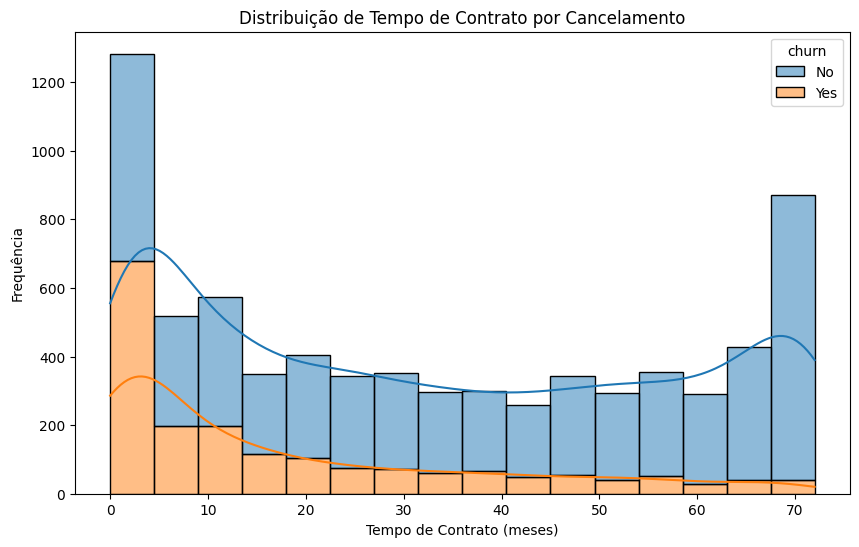

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_viz, x='tenure', hue='churn', multiple="stack", kde=True)
plt.title('Distribuição de Tempo de Contrato por Cancelamento')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Frequência')
plt.show()

In [44]:
print("\nEstatísticas descritivas das variáveis numéricas por Churn:")
print(df.groupby('churn')[['tenure', 'charges.monthly', 'charges.total']].describe())


Estatísticas descritivas das variáveis numéricas por Churn:
       tenure                                                     \
        count       mean        std  min   25%   50%   75%   max   
churn                                                              
0      5398.0  37.321045  24.178367  0.0  14.0  37.0  61.0  72.0   
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      charges.monthly             ...                  charges.total  \
                count       mean  ...      75%     max         count   
churn                             ...                                  
0              5398.0  61.354224  ...  88.6375  118.75        5398.0   
1              1869.0  74.441332  ...  94.2000  118.35        1869.0   

                                                                              
              mean          std    min      25%       50%       75%      max  
churn                                                                         


## Relatório de Análise de Evasão de Clientes (Churn) - Telecom X

Com base na análise exploratória dos dados fornecidos, os seguintes insights sobre a evasão de clientes na Telecom X foram observados:

**1. Distribuição Geral de Churn:**

*   A análise da distribuição geral de clientes que cancelaram mostra que a maioria dos clientes **não** cancelou o serviço. No entanto, há uma parcela significativa de clientes que efetuou o cancelamento, o que justifica a investigação dos fatores contribuintes.

**2. Churn por Gênero:**

*   A distribuição de churn por gênero indica que não há uma diferença significativa na taxa de cancelamento entre clientes do sexo masculino e feminino. Ambos os grupos apresentam um número similar de clientes que cancelaram o serviço.

**3. Churn por Tipo de Contrato:**

*   A análise do churn por tipo de contrato revela um padrão claro: clientes com contratos **mês a mês** apresentam uma taxa de churn consideravelmente maior em comparação com aqueles com contratos de um ou dois anos. Isso sugere que contratos de longo prazo podem ser um fator de retenção importante.

**4. Churn por Encargos Mensais e Totais:**

*   Os histogramas de encargos mensais e totais por churn indicam que clientes com churn tendem a ter encargos mensais mais altos. A distribuição de encargos totais para clientes com churn é mais concentrada em valores menores, o que pode estar relacionado ao menor tempo de contrato desses clientes.

**5. Churn por Tempo de Contrato:**

*   O histograma de tempo de contrato por churn demonstra que clientes que cancelam o serviço geralmente possuem um tempo de contrato **menor** em comparação com os clientes que permanecem. Isso reforça a ideia de que a lealdade do cliente ao longo do tempo está inversamente relacionada à probabilidade de churn.

**6. Estatísticas Descritivas por Churn:**

*   As estatísticas descritivas das variáveis numéricas agrupadas por churn confirmam as observações dos histogramas:
    *   Clientes que cancelaram têm, em média, um `tenure` significativamente menor.
    *   Clientes que cancelaram têm, em média, `charges.monthly` mais altos.
    *   Clientes que cancelaram têm, em média, `charges.total` menores, o que é esperado dado o menor tempo de contrato.

**Conclusão Preliminar:**

Com base nesta análise inicial, os principais fatores associados à evasão de clientes na Telecom X parecem ser:

*   **Tipo de Contrato:** Clientes com contratos mês a mês são mais propensos a cancelar.
*   **Encargos Mensais:** Clientes com encargos mensais mais altos parecem ter uma maior propensão ao churn.
*   **Tempo de Contrato:** Clientes com menor tempo de contrato são mais propensos a cancelar.

Estes insights podem ser usados para desenvolver estratégias de retenção direcionadas, como oferecer incentivos para contratos de longo prazo ou analisar a estrutura de preços para clientes com altos encargos mensais.

**Próximos Passos Sugeridos:**

*   Investigar a fundo outros fatores categóricos (InternetService, PaymentMethod, etc.) e sua relação com o churn.
*   Considerar a criação de modelos preditivos para identificar clientes com alto risco de churn.
*   Realizar uma análise mais detalhada da interação entre as variáveis.

# Análise de Evasão de Clientes (Churn) - Telecom X

Este projeto tem como objetivo analisar os dados de clientes da Telecom X para identificar os fatores que contribuem para a evasão de clientes (churn) e fornecer insights para estratégias de retenção.

## Dados

Os dados utilizados nesta análise foram obtidos de um arquivo JSON disponível em um repositório GitHub. O dataset contém informações sobre o perfil dos clientes, serviços de telefone e internet, e dados da conta, incluindo se o cliente cancelou o serviço.

## Análise e Processamento de Dados

As seguintes etapas foram realizadas para preparar e analisar os dados:

1.  **Carregamento dos Dados:** Os dados foram carregados diretamente da URL do arquivo JSON para um DataFrame pandas.
2.  **Exploração Inicial:** Foi realizada uma exploração inicial para entender a estrutura dos dados, verificar tipos de dados, identificar valores nulos e obter estatísticas descritivas.
3.  **Normalização dos Dados:** As colunas aninhadas ('customer', 'phone', 'internet', 'account') foram normalizadas e combinadas com o DataFrame principal.
4.  **Tratamento de Dados:**
    *   A coluna 'Charges.Total' foi convertida para tipo numérico, tratando possíveis erros e preenchendo valores nulos com a mediana.
    *   Valores como 'No internet service' e 'No phone service' foram padronizados para 'No' nas colunas de serviços correspondentes.
    *   Variáveis binárias foram convertidas para 0 e 1 para facilitar a análise.
    *   Nomes de colunas foram padronizados (minúsculas e substituição de espaços por underscores).
    *   Duplicatas foram removidas.
    *   Valores nulos nas colunas numéricas foram preenchidos com a mediana.
5.  **Análise Exploratória de Dados (EDA):**
    *   Análise da distribuição geral de churn.
    *   Análise da distribuição de churn por gênero, tipo de contrato, encargos mensais e totais, e tempo de contrato (tenure).
    *   Cálculo de estatísticas descritivas para variáveis numéricas agrupadas por churn.

## Principais Insights da Análise de Churn

A análise exploratória revelou os seguintes fatores chave associados à evasão de clientes:

*   **Tipo de Contrato:** Clientes com contratos **mês a mês** apresentam uma probabilidade significativamente maior de cancelar o serviço em comparação com aqueles com contratos de longo prazo (um ou dois anos).
*   **Encargos Mensais:** Clientes com **encargos mensais mais altos** tendem a ter uma maior propensão ao churn.
*   **Tempo de Contrato (Tenure):** Clientes com **menor tempo de contrato** na empresa são mais propensos a cancelar.
*   **Gênero:** Não foi observada uma diferença significativa na taxa de churn entre homens e mulheres.

## Conclusão

Os insights obtidos sugerem que a Telecom X deve focar suas estratégias de retenção em clientes com contratos mês a mês, aqueles com encargos mensais elevados e clientes com menor tempo de contrato. Ações como oferecer incentivos para contratos de longo prazo e revisar a estrutura de preços para clientes com altos encargos podem ser eficazes.

